## .....SENTIMENT ANALYSIS PROJECT.....

Objective:- Classify text data into one of the three categories: Positive, Negative, or Neutral.
--
Input: Raw text data
--
Output: Predicted sentiment label for each text:
--
1) Positive

2) Negative

3) Neutral

--

libraries used and why :
----------------------------------

pandas → read CSV, handle reviews

numpy → numerical operations

re → remove HTML tags, punctuation using regex

stopwords → remove common useless words

WordNetLemmatizer → convert words to base form

word_tokenize → split sentence into words

Tfidfvectorizer → Converts text into numbers ML models can understand

train_test_split → Separate training and testing data

LogisticRegression → Simple, strong classifier for text data

accuracy_score, classification_report, confusion_matrix → Check how good your model is

LabelEncoder → Convert text labels into numbers

joblib → Save trained model for reuse

In [3]:
# import libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

In [9]:
# load the datasets
df=pd.read_csv("IMDB Dataset.csv")
print(df.head())

print(df.shape)


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
(50000, 2)


In [10]:
print(df.describe())
print("---------")
print(df.info())

                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000
---------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


In [13]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\divya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\divya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\divya\AppData\Roaming\nltk_data...


True

In [15]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\divya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [11]:
#create cleaning function

stop_words = set(stopwords.words('english'))

lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    
    text = re.sub(r'<.*?>', '', text)      # remove HTML tags

    text = re.sub(r'[^a-zA-Z]', ' ', text) # remove punctuation & numbers
    
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    return " ".join(words)

In [17]:
# apply cleaning 
df['cleaned_review'] = df['review'].apply(clean_text)



In [18]:
# result
df[['review', 'cleaned_review']].head()

,review,cleaned_review
0,One of the other reviewers has mentioned that ...,one reviewer mentioned watching oz episode hoo...
1,A wonderful little production. <br /><br />The...,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei love time money visually stunnin...


# df['cleaned_review'] = df['review'].apply(clean_text)
What happens? :-Applies cleaning function to each review. Creates new column.
Why? :-Keeps original text safe. Uses cleaned text for modeling.

-----------------------------------------------------------------------------------

# We clean text to remove noise, standardize words, reduce dimensionality, and improve model performance. Tokenization, stopword removal, and lemmatization help the model focus on meaningful patterns.


In [20]:
# feature extraction(TF-IDF)
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_review'])

# TF-IDF gives higher weight to important words and lower weight to common words.

-------------------------------------------------------------------------------------------

# tfidf = TfidfVectorizer(max_features=5000)
What happens? :-Creates a TF-IDF vectorizer object.

Why? :-max_features=5000
→ keeps only 5000 most important words
→ removes rare & noisy words
→ faster and better model

-------------------------------------------------------------------------------------------

# X = tfidf.fit_transform(df['cleaned_review'])
What happens? :-This line does TWO things:

1️⃣ fit

Learns vocabulary from text.

Calculates IDF values.

2️⃣ transform

Converts text into numeric vectors.

Why? :-ML models work only on numbers.

----------------------------------------------------------------
CONVERT TEXT INTO MATRIX.

In [22]:
X_top5 = X[:5]

feature_names = tfidf.get_feature_names_out()  # Gets all words learned by TF-IDF.

df_tfidf_top5 = pd.DataFrame(
    X_top5.toarray(),
    columns=feature_names
)
df_tfidf_top5 = df_tfidf_top5.loc[:, (df_tfidf_top5 != 0).any(axis=0)]  
# Removes columns where all values are 0. Shows only words that actually appear
df_tfidf_top5

,acting,action,actor,addiction,agenda,air,alive,allen,another,appeal,...,word,work,world,worth,would,written,year,york,young,zombie
0,0.00000,0.000000,0.000000,0.000000,0.089948,0.000000,0.000000,0.000000,0.000000,0.067899,...,0.100673,0.000000,0.000000,0.000000,0.028641,0.000000,0.000000,0.000000,0.00000,0.000000
1,0.00000,0.000000,0.063194,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.084318,0.000000,0.094286,0.000000,0.000000,0.00000,0.000000
2,0.00000,0.000000,0.000000,0.165618,0.000000,0.114488,0.000000,0.141448,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062918,0.000000,0.07792,0.000000
3,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.223395
4,0.05233,0.067908,0.000000,0.000000,0.000000,0.000000,0.103001,0.000000,0.060628,0.000000,...,0.000000,0.057114,0.065119,0.000000,0.000000,0.000000,0.000000,0.098995,0.00000,0.000000


In [24]:
# label encoding

le = LabelEncoder() 
y = le.fit_transform(df['sentiment'])
print(le.classes_)
print(y[:10])

['negative' 'positive']
[1 1 1 0 1 1 1 0 0 1]


In [26]:
# split data into test and train 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape)
print(X_test.shape)
print("------------------")
print(len(y_train))
print(len(y_test))

(40000, 5000)
(10000, 5000)
------------------
40000
10000


In [27]:
# logistic regression model 

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [28]:
# model prediction
y_pred = model.predict(X_test)

In [29]:
# check model performance

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8891
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

[[4335  626]
 [ 483 4556]]


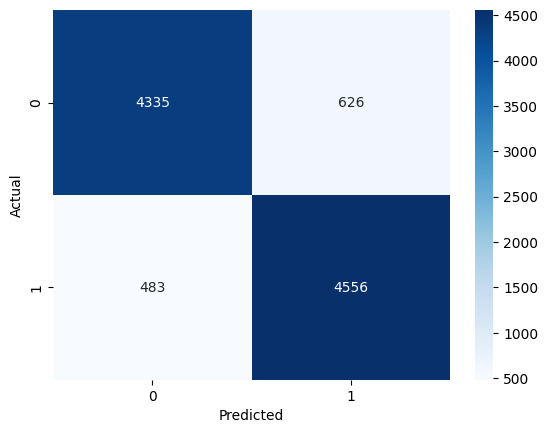

In [30]:
# showing a confusion matrix using heatmap

import matplotlib.pyplot as plt   # Needed to display graphs/images.
import seaborn as sns             # Makes plots colorful and readable easily.

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
🔹 cm
-

Data to plot (confusion matrix numbers).

🔹 annot=True
-
What happens?

Writes numbers inside each box.

Without:

Only colors shown
With:

Colors + numbers

🔹 fmt='d'
-
What happens?

Format numbers as integers.

Why?

Confusion matrix contains counts (whole numbers).

🔹 cmap='Blues'
-
What happens?

Chooses color style.

Why?

Dark blue → large value

Light blue → small value

# understanding precision/recall/f1-score

              Predicted
              Negative   Positive
Actual Negative     TN        FP
Actual Positive     FN        TP

🔹 1️⃣ PRECISION
When the model says “Positive”, how often is it correct?
-

📐 Formula:
Precision = TP / (TP + FP)
Precision = 4500 / (4500 + 700)
          = 0.86
          
🧠 When Precision is important?
-

-Fake review detection

-Spam detection

-Wrong positive is costly

----------------------------------------------------------------------

🔹 2️⃣ RECALL
🔍 Question Recall asks:
-

Out of all actual Positive reviews, how many did the model find?
-

📐 Formula:
Recall = TP / (TP + FN)
Recall = 4500 / (4500 + 500)
       = 0.90
Meaning:
👉 Model detected 90% of all positive reviews

🧠 When Recall is important?
-

-Disease detection

-Fraud detection

-Missing positives is costly

------------------------------------------------------------------------

🔹 3️⃣ F1-SCORE
🔍 Question F1 asks:
-

How good is the model overall for this class?
-

📐 Formula:
F1 = 2 × (Precision × Recall) / (Precision + Recall)
Precision = 0.86
Recall = 0.90

F1 = 2 × (0.86 × 0.90) / (0.86 + 0.90)
   = 0.88

Meaning:

👉 Balanced score between precision & recall

-------------------------------------------------------------------------------

# Precision: How many predicted positives were actually correct

# Recall: How many actual positives were correctly found

# F1-score: Balance between precision and recall


In [32]:
# save the trained model 
joblib.dump(model, "sentiment_model.pkl")

['sentiment_model.pkl']

In [33]:
# save tf-idf vectorizer
joblib.dump(tfidf, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']

In [34]:
# save the label encoder
joblib.dump(le, "label_encoder.pkl")

['label_encoder.pkl']